In [ ]:

import numpy as np



from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC


In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [5]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [6]:
# 准备训练数据
X, y = make_regression(n_samples=100, n_features=3, noise=0.1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.shape

(100, 3)

In [8]:
y.shape

(100,)

In [14]:
ZZFeatureMap?

In [9]:

num_features = X.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)

In [10]:
# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(num_features, name="vf")
ansatz.ry(param_y, 0)

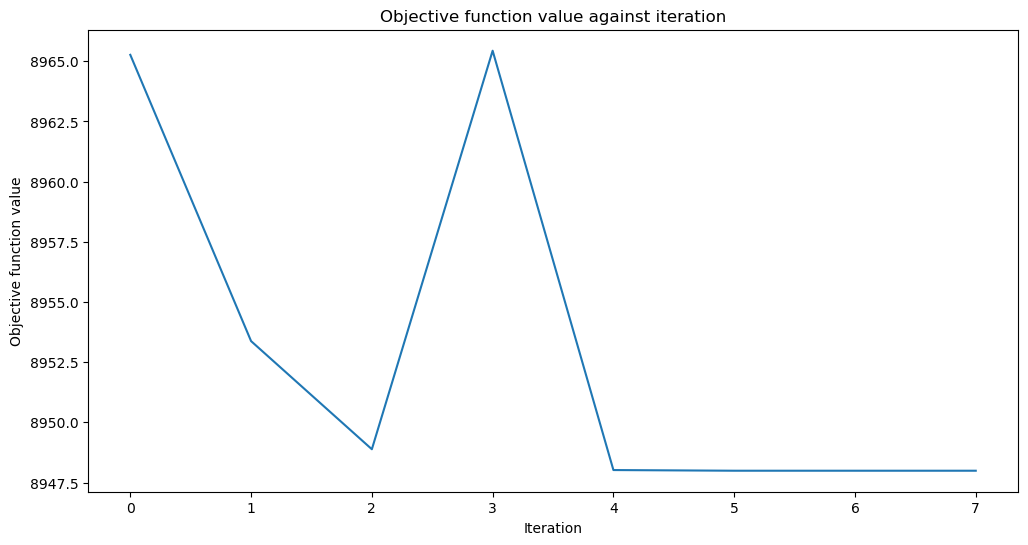

In [11]:
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=100),
    callback=callback_graph,
    loss="squared_error"
)
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X, y)
# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

In [12]:
# score result
vqr.score(X, y)

-0.005672322436214294

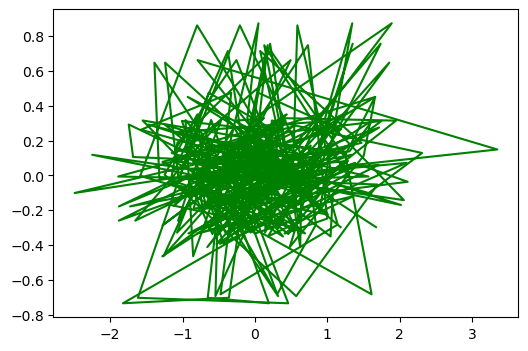

In [13]:
# plot fitted line
y_ = vqr.predict(X)
plt.plot(X, y_, "g-")
plt.show();